# Customer Segmentation Using RFM 

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1,h2 {
    text-align: center;
    background-color: black;
    padding: 20px;
    margin: 0;
    color: yellow;
    font-family: ariel;
    border-radius: 80px
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

## Settings and Import Dataset

In [483]:
# importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np

#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Dataset
df = pd.read_csv("Online_Retail.csv")

#Convert object to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

## Summary

In [200]:
df.head() #df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495478 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 30.2+ MB


In [202]:
df.shape 

(495478, 8)

In [203]:
df.isnull().sum() #Shows missing variables in the dataset.

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [204]:
#what is the number of unique products?
df["Description"].nunique()

4202

In [205]:
#how many of each product? 
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2271
JUMBO BAG RED RETROSPOT               2001
REGENCY CAKESTAND 3 TIER              1859
PARTY BUNTING                         1634
LUNCH BAG RED RETROSPOT               1460
Name: Description, dtype: int64

In [206]:
#What is the most ordered product?
df.groupby("Description").agg({"Quantity":"sum"}).head()

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,138
50'S CHRISTMAS GIFT BAG LARGE,1725
DOLLY GIRL BEAKER,711
I LOVE LONDON MINI BACKPACK,206
NINE DRAWER OFFICE TIDY,48


In [207]:
#How to sort output by quantitiy in descending order?
df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
JUMBO BAG RED RETROSPOT,43167
POPCORN HOLDER,34365
ASSORTED COLOUR BIRD ORNAMENT,33679
WHITE HANGING HEART T-LIGHT HOLDER,33193


In [208]:
#How many invoices have been issued in total?
df["InvoiceNo"].nunique()

23494

In [209]:
#We will do it below

#How much money was earned in total per invoice? 
#df["TotalPrice"] = df["Quantity"]*df["UnitPrice"]
#Grouped according to the invoice number and the total of the "Total Price" variable was brought. In this way, the total amount of money earned per invoice was calculated.
#df.groupby("InvoiceNo").agg({"TotalPrice":"sum"}).head()

In [210]:
#What are the most expensive products?
df.sort_values("UnitPrice", ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
204891,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.000,15098.000,United Kingdom
479258,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.460,NaN,United Kingdom
41332,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888.020,NaN,United Kingdom
41333,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16453.710,NaN,United Kingdom
15591,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.330,NaN,United Kingdom


## Data Preparation (DataCamp Version)

In [211]:
#Removing Missing Values
#df = df[pd.notnull(df['CustomerID'])]

In [138]:
#df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


In [139]:
#df.isnull().sum() #Shows missing variables in the dataset.

(361878, 8)

In [ ]:
#df.shape

In [140]:
#Removing Duplicates
#df['Country'] = df['Country'].drop_duplicates()
#df['CustomerID'] = df['CustomerID'].drop_duplicates()

# will make those two variables full of Na

In [129]:
#Effect on removing missing values
495478 - 361878

133600

In [130]:
#loss 27% of original data
133600 / 495478

0.2696386116033406

## Data Preparation (Emine Bozkus Version)

In [484]:
df.isnull().sum() #missing observations
df.dropna(inplace = True) #missing values are permanently deleted.
df = df[~df["InvoiceNo"].str.contains("C", na=False)]   #Returned invoices are removed from the data. They are identified with a "C" on the invoice.

In [406]:
df.shape

(354345, 8)

In [214]:
# effect on removing missing values
495478 - 354345

141133

In [215]:
# loss 28% of original data
141133 / 495478

0.2848421120614841

In [431]:
df.isnull().sum() #Shows missing variables in the dataset.

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [407]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.390,17850.000,United Kingdom


## Specify location you want to check

In [2]:
# In the case you have various locations, you can check the top ten country's customer

#df.Country.value_counts()[:10].plot(kind='bar')

# This data only have one country

In [219]:
# Select the location
df = df[df['Country'].str.contains("United Kingdom")]
df.shape

(354345, 8)

In [233]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,354345.000,354345.000,354345.000
mean,12.049,2.964,15552.436
std,190.428,17.862,1594.546
min,1.000,0.000,12346.000
25%,2.000,1.250,14194.000
50%,4.000,1.950,15522.000
75%,12.000,3.750,16931.000
max,80995.000,8142.750,18287.000


## Calculating RFM Metrics

In [485]:
# Plausible transactions should be above 0 not negative
df = df[(df['Quantity']>0)]

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [486]:
#Filter required Columns
df = df[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice', 'Description', 'StockCode']]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,Description,StockCode,TotalPrice
0,17850.000,2010-12-01 08:26:00,536365,6,2.550,WHITE HANGING HEART T-LIGHT HOLDER,85123A,15.300
1,17850.000,2010-12-01 08:26:00,536365,6,3.390,WHITE METAL LANTERN,71053,20.340
2,17850.000,2010-12-01 08:26:00,536365,8,2.750,CREAM CUPID HEARTS COAT HANGER,84406B,22.000
3,17850.000,2010-12-01 08:26:00,536365,6,3.390,KNITTED UNION FLAG HOT WATER BOTTLE,84029G,20.340
4,17850.000,2010-12-01 08:26:00,536365,6,3.390,RED WOOLLY HOTTIE WHITE HEART.,84029E,20.340


In [224]:
df['InvoiceDate'].min(),df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [487]:
today_date = dt.datetime(2011,12,11) # we add two days from max InvoiceDate to prevented recency value being 0.
type(today_date)      #Type information is checked.

datetime.datetime

In [334]:
# Make sure we have date type, so we can compute the date below
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   354345 non-null  float64       
 1   InvoiceDate  354345 non-null  datetime64[ns]
 2   InvoiceNo    354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   UnitPrice    354345 non-null  float64       
 5   Description  354345 non-null  object        
 6   StockCode    354345 non-null  object        
 7   TotalPrice   354345 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 24.3+ MB


## RFM 

### Emine Bozkus Version

In [488]:
rfm = df.groupby(['CustomerID'], as_index=False).agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                 'InvoiceNo': lambda Invoice: Invoice.nunique(), #using nunique doesn't take into account nan
                                 'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.head()             #customer ids are deduplicated.

###### THESE CODES UP AND DOWN JUST PROVIDE SAME RESULTS!!!

# finding Recency and Monetary values.
#df_x = df.groupby('CustomerID').agg({'TotalPrice': lambda x: x.sum(), #monetary value
                                     #'InvoiceDate': lambda x: (today_date - x.max()).days}) #recency value
#x.max()).days; last shopping date of customers

#df_y = df.groupby(['CustomerID','InvoiceNo']).agg({'TotalPrice': lambda x: x.sum()})
#df_z = df_y.groupby('CustomerID').agg({'TotalPrice': lambda x: len(x)}) 
#finding the frequency value per capita
#creating the RFM table
#rfm = pd.merge(df_x,df_z, on='CustomerID')
#determination of column names
#rfm.rename(columns= {'InvoiceDate': 'recency',
                          #'TotalPrice_y': 'frequency',
                          #'TotalPrice_x': 'monetary'}, inplace= True)
rfm.head()

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12346.000,326,1,77183.600
1,12747.000,3,11,4196.010
2,12748.000,1,210,33719.730
3,12749.000,4,5,4090.880
4,12820.000,4,4,942.340


#### Table Comment: The customer with the 12346th Customer ID made a purchase of £ 77.183. The last purchase of this customer is about 326 day ago (depending on today_date) and the number of purchases is 1.

In [490]:
rfm.columns = ['CustomerID', 'recency', 'frequency', 'monetary']    #Change the name subsequently
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.000,326,1,77183.600
1,12747.000,3,11,4196.010
2,12748.000,1,210,33719.730
3,12749.000,4,5,4090.880
4,12820.000,4,4,942.340


In [491]:
rfm = rfm[rfm["monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,3920.000,15562.060,1576.595,12346.000,14208.750,15569.500,16913.250,18287.000
recency,3920.000,92.742,99.533,1.000,18.000,51.000,143.000,374.000
frequency,3920.000,4.247,7.206,1.000,1.000,2.000,5.000,210.000
monetary,3920.000,1864.386,7482.817,3.750,300.280,652.280,1576.585,259657.300


In [492]:
rfm.shape     #size of new dataset

(3920, 4)

### Datacamp Version

In [371]:
rfm = df.groupby(['CustomerID'], as_index=False).agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    'InvoiceNo': lambda num: len(num), #using len count the missing values
                                    'TotalPrice': lambda price: price.sum()})
rfm.head()  

,CustomerID,InvoiceDate,InvoiceNo,TotalPrice
0,12346.000,326,1,77183.600
1,12747.000,3,103,4196.010
2,12748.000,1,4596,33719.730
3,12749.000,4,199,4090.880
4,12820.000,4,59,942.340


In [277]:
# This code make the variable that used in groupby become index

#rfm = df.groupby(['CustomerID'], as_index=False).agg({'InvoiceDate': lambda date: (today_date - date.max()).days,
                                    #'InvoiceNo': lambda num: len(num), #using len count the missing values
                                    #'TotalPrice': lambda price: price.sum()})
#rfm.head()  

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.000,326,1,77183.600
12747.000,3,103,4196.010
12748.000,1,4596,33719.730
12749.000,4,199,4090.880
12820.000,4,59,942.340


In [372]:
rfm.columns = ['CustomerID', 'recency', 'frequency', 'monetary']    #Change the name subsequently

In [373]:
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.000,326,1,77183.600
1,12747.000,3,103,4196.010
2,12748.000,1,4596,33719.730
3,12749.000,4,199,4090.880
4,12820.000,4,59,942.340


In [374]:
rfm = rfm[rfm["monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,3920.000,15562.060,1576.595,12346.000,14208.750,15569.500,16913.250,18287.000
recency,3920.000,92.742,99.533,1.000,18.000,51.000,143.000,374.000
frequency,3920.000,90.394,217.819,1.000,17.000,41.000,99.250,7847.000
monetary,3920.000,1864.386,7482.817,3.750,300.280,652.280,1576.585,259657.300


In [339]:
rfm.shape     #size of new dataset

(3920, 4)

In [341]:
# Make sure we have int data type to perform math
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   float64
 1   recency     3920 non-null   int64  
 2   frequency   3920 non-null   int64  
 3   monetary    3920 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 153.1 KB


In [342]:
# if not change the data type
rfm['recency'] = rfm['recency'].astype(int) #from int64 to int32, actually in our case they are just the same int
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3920
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   float64
 1   recency     3920 non-null   int32  
 2   frequency   3920 non-null   int64  
 3   monetary    3920 non-null   float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 137.8 KB


## Calculating RFM Score

### Emine Bozkus Version

In [495]:
#RFM score values
# qcut() function: Discretize variables into equal-sized buckets based on rank or based on sample quantiles.
rfm_df1 = rfm
rfm_df1["recency_score"] = pd.qcut(rfm_df1['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df1["frequency_score"] = pd.qcut(rfm_df1['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm_df1["monetary_score"] = pd.qcut(rfm_df1['monetary'], 5, labels=[1, 2, 3, 4, 5]) 

rfm_df1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_5920\873929280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df1["recency_score"] = pd.qcut(rfm_df1['recency'], 5, labels=[5, 4, 3, 2, 1])
C:\Users\USER\AppData\Local\Temp\ipykernel_5920\873929280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df1["frequency_score"] = pd.qcut(rfm_df1['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
C:\Users\USER\AppData\Local\Temp\ipykernel_5920\873929280.py:6: SettingWithCopyWarning: 
A value is try

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,12346.000,326,1,77183.600,1,1,5
1,12747.000,3,11,4196.010,5,5,5
2,12748.000,1,210,33719.730,5,5,5
3,12749.000,4,5,4090.880,5,4,5
4,12820.000,4,4,942.340,5,4,4


In [496]:
#RFM score values are combined side by side in str format
(rfm_df1['recency_score'].astype(str) + 
 rfm_df1['frequency_score'].astype(str) + 
 rfm_df1['monetary_score'].astype(str)).head()

0    115
1    555
2    555
3    545
4    544
dtype: object

In [497]:
#calculation of the RFM score
rfm_df1["rfm_score"] = (rfm_df1['recency_score'].astype(str) + 
                       rfm_df1['frequency_score'].astype(str) + 
                       rfm_df1['monetary_score'].astype(str))
rfm_df1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_5920\2803233361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df1["rfm_score"] = (rfm_df1['recency_score'].astype(str) +


,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
0,12346.000,326,1,77183.600,1,1,5,115
1,12747.000,3,11,4196.010,5,5,5,555
2,12748.000,1,210,33719.730,5,5,5,555
3,12749.000,4,5,4090.880,5,4,5,545
4,12820.000,4,4,942.340,5,4,4,544


In [498]:
#transposition of the RFM table. This makes it easier to evaluate.
rfm_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,3920.000,15562.060,1576.595,12346.000,14208.750,15569.500,16913.250,18287.000
recency,3920.000,92.742,99.533,1.000,18.000,51.000,143.000,374.000
frequency,3920.000,4.247,7.206,1.000,1.000,2.000,5.000,210.000
monetary,3920.000,1864.386,7482.817,3.750,300.280,652.280,1576.585,259657.300


In [499]:
#customers with RFM Score 555
rfm_df1[rfm_df1["rfm_score"] == "555"].head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
1,12747.000,3,11,4196.010,5,5,5,555
2,12748.000,1,210,33719.730,5,5,5,555
21,12839.000,3,14,5591.420,5,5,5,555
23,12841.000,5,25,4022.350,5,5,5,555
60,12901.000,9,28,17654.540,5,5,5,555


In [500]:
#customers with RFM Score 111
rfm_df1[rfm_df1["rfm_score"] == "111"].head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
5,12821.000,215,1,92.720,1,1,1,111
14,12831.000,263,1,215.050,1,1,1,111
34,12855.000,373,1,38.100,1,1,1,111
61,12902.000,265,1,138.680,1,1,1,111
80,12929.000,312,1,117.850,1,1,1,111


In [501]:
#segmenting of customers according to RecencyScore and FrequencyScore values
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [502]:
#creation of segment variable
rfm_df1['segment'] = rfm_df1['recency_score'].astype(str) + rfm_df1['frequency_score'].astype(str)
rfm_df1['segment'] = rfm_df1['segment'].replace(seg_map, regex=True)
rfm_df1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_5920\305492580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df1['segment'] = rfm_df1['recency_score'].astype(str) + rfm_df1['frequency_score'].astype(str)
C:\Users\USER\AppData\Local\Temp\ipykernel_5920\305492580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df1['segment'] = rfm_df1['segment'].replace(seg_map, regex=True)


,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score,segment
0,12346.000,326,1,77183.600,1,1,5,115,Hibernating
1,12747.000,3,11,4196.010,5,5,5,555,Champions
2,12748.000,1,210,33719.730,5,5,5,555,Champions
3,12749.000,4,5,4090.880,5,4,5,545,Champions
4,12820.000,4,4,942.340,5,4,4,544,Champions


In [503]:
rfm_df1[["segment", "recency","frequency","monetary"]].groupby("segment").agg(["mean","count"])

recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
About to Sleep       53.494   324     1.170   324  431.470   324
At Risk             154.453   532     2.900   532 1060.895   532
Can't Lose          131.915    59     8.542    59 2841.441    59
Champions             6.399   577    12.234   577 6139.733   577
Hibernating         216.941   964     1.099   964  435.487   964
Loyal Customers      33.762   730     6.425   730 2507.696   730
Need Attention       51.853   170     2.347   170  834.705   170
New Customers         7.763    38     1.000    38  374.822    38
Potential Loyalists  17.359   440     2.025   440 1055.883   440
Promising            23.814    86     1.000    86  264.759    86

In [547]:
#rfm_df1

In [360]:
#pip install squarify
import squarify

In [505]:
rfm_df1.groupby('segment').agg(
    min_recency=('recency', 'min'),
    max_recency=('recency', 'max'),
    min_frequency=('frequency', 'min'),
    max_frequency=('frequency', 'max'),
    min_monetary=('monetary', 'min'),
    max_monetary=('monetary', 'max'),
).reset_index().sort_values(by='min_recency')

,segment,min_recency,max_recency,min_frequency,max_frequency,min_monetary,max_monetary
3,Champions,1,13,3,210,201.120,259657.300
8,Potential Loyalists,1,33,1,3,20.800,168472.500
7,New Customers,2,13,1,1,41.990,3861.000
5,Loyal Customers,15,72,3,63,36.560,81024.840
9,Promising,15,33,1,1,30.000,871.540
0,About to Sleep,34,72,1,2,6.200,2626.300
6,Need Attention,34,72,2,3,6.900,4932.200
1,At Risk,73,374,2,6,52.000,44534.300
2,Can't Lose,73,373,6,34,70.020,10254.180
4,Hibernating,73,374,1,2,3.750,77183.600


### Treemap & Pie Visualization 

In [506]:
df_treemap = rfm_df1.groupby('segment').agg(
    customers=('CustomerID', 'count')
).reset_index()

In [507]:
df_treemap.head()

,segment,customers
0,About to Sleep,324
1,At Risk,532
2,Can't Lose,59
3,Champions,577
4,Hibernating,964


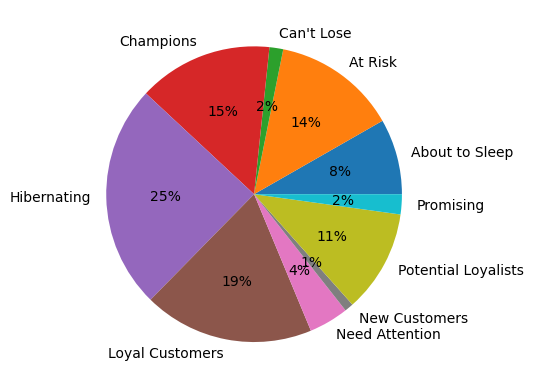

In [546]:
import matplotlib.pyplot as plt
plt.pie(df_treemap['customers'],
        labels=df_treemap['segment'],
        autopct='%.0f%%')
plt.show()

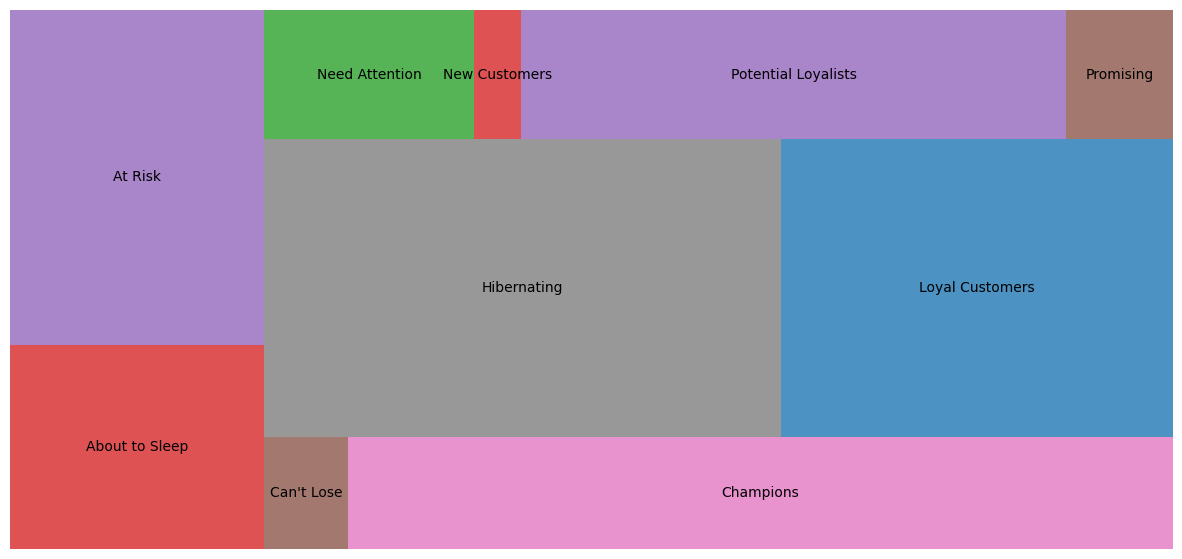

In [542]:
fig, ax = plt.subplots(1, figsize = (15,7))

squarify.plot(sizes=df_treemap['customers'], 
              label=df_treemap['segment'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:blue', 'tab:green']
             )
plt.axis('off')
plt.show()

### Datacamp Version

In [322]:
# Computing Quantile of RFM values
rfm_df2 = rfm
rfm_df2['r_quartile'] = pd.qcut(rfm_df2['recency'], 4, ['1','2','3','4'])
rfm_df2['f_quartile'] = pd.qcut(rfm_df2['frequency'], 4, ['4','3','2','1'])
rfm_df2['m_quartile'] = pd.qcut(rfm_df2['monetary'], 4, ['4','3','2','1'])
rfm_df2.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12346.000,326,1,77183.600,4,4,1
1,12747.000,3,103,4196.010,1,1,1
2,12748.000,1,4596,33719.730,1,1,1
3,12749.000,4,199,4090.880,1,1,1
4,12820.000,4,59,942.340,1,2,2


#### RFM Result Interpretation
#### Combine all three quartiles(r_quartile,f_quartile,m_quartile) in a single column, this rank will help you to segment the customers well group.

In [323]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,12346.000,326,1,77183.600,4,4,1,441
1,12747.000,3,103,4196.010,1,1,1,111
2,12748.000,1,4596,33719.730,1,1,1,111
3,12749.000,4,199,4090.880,1,1,1,111
4,12820.000,4,59,942.340,1,2,2,122


In [324]:
# Filter out Top/Best customers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
3784,18102.000,1,431,259657.300,1,1,1,111
3315,17450.000,9,337,194550.790,1,1,1,111
3357,17511.000,3,963,91062.380,1,1,1,111
2767,16684.000,5,277,66653.560,1,1,1,111
903,14096.000,5,5111,65164.790,1,1,1,111


### Geeksforgeeks Version

Ranking Customer’s based upon their recency, frequency, and monetary score.
Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [384]:
rfm_df3 = rfm
rfm_df3['R_rank'] = rfm['recency'].rank(ascending=False)
rfm_df3['F_rank'] = rfm['frequency'].rank(ascending=True)
rfm_df3['M_rank'] = rfm['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df3['R_rank_norm'] = (rfm_df3['R_rank']/rfm_df3['R_rank'].max())*100
rfm_df3['F_rank_norm'] = (rfm_df3['F_rank']/rfm_df3['F_rank'].max())*100
rfm_df3['M_rank_norm'] = (rfm_df3['F_rank']/rfm_df3['M_rank'].max())*100
 
rfm_df3.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df3.head()

,CustomerID,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.000,326,1,77183.600,1,1,5,115,hibernating5,3.648,0.906,0.906
1,12747.000,3,103,4196.010,5,4,5,545,5loyal_customers,96.083,76.008,76.008
2,12748.000,1,4596,33719.730,5,5,5,555,champions5,100.000,99.949,99.949
3,12749.000,4,199,4090.880,5,5,5,555,champions5,93.959,89.503,89.503
4,12820.000,4,59,942.340,5,4,4,544,5loyal_customers,93.959,60.702,60.702


#### Calculating RFM Score, RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [385]:
rfm_df3['RFM_Score'] = 0.15*rfm_df3['R_rank_norm']+0.28 * \
    rfm_df3['F_rank_norm']+0.57*rfm_df3['M_rank_norm']
rfm_df3['RFM_Score'] *= 0.05
rfm_df3 = rfm_df3.round(2)
rfm_df3[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.000,0.070
1,12747.000,3.950
2,12748.000,5.000
3,12749.000,4.510
4,12820.000,3.280
5,12821.000,0.460
6,12822.000,2.590


In [386]:
rfm_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3920 entries, 0 to 3920
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerID       3920 non-null   float64 
 1   recency          3920 non-null   int64   
 2   frequency        3920 non-null   int64   
 3   monetary         3920 non-null   float64 
 4   recency_score    3920 non-null   category
 5   frequency_score  3920 non-null   category
 6   monetary_score   3920 non-null   category
 7   RFM_SCORE        3920 non-null   object  
 8   segment          3920 non-null   object  
 9   R_rank_norm      3920 non-null   float64 
 10  F_rank_norm      3920 non-null   float64 
 11  M_rank_norm      3920 non-null   float64 
 12  RFM_Score        3920 non-null   float64 
dtypes: category(3), float64(6), int64(2), object(2)
memory usage: 349.0+ KB


#### Rating Customer based upon the RFM score. rfm score > 4.5 : Top Customer, 4.5 > rfm score > 4 : High Value Customer, 4 > rfm score > 3 : Medium value customer, 3 > rfm score > 1.6 : Low-value customer, rfm score < 1.6 :Lost Customer.

In [387]:
rfm_df3["Customer_segment"] = np.where(rfm_df3['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df3['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df3['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df3['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df3[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerID,RFM_Score,Customer_segment
0,12346.000,0.070,Lost Customers
1,12747.000,3.950,Medium Value Customer
2,12748.000,5.000,Top Customers
3,12749.000,4.510,Top Customers
4,12820.000,3.280,Medium Value Customer
5,12821.000,0.460,Lost Customers
6,12822.000,2.590,Low Value Customers
7,12823.000,0.550,Lost Customers
8,12824.000,1.850,Low Value Customers
9,12826.000,3.810,Medium Value Customer


### Visualizing the customer segmentations (Emine Bozkus & Geeksforgreek)

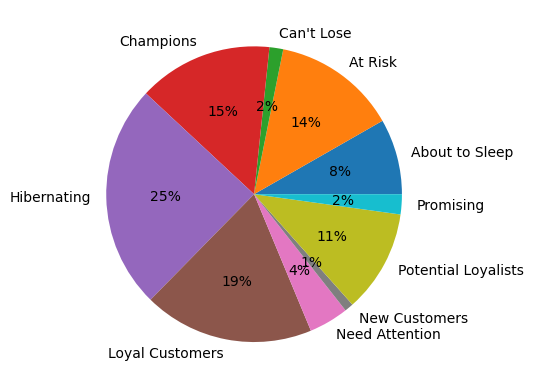

In [548]:
import matplotlib.pyplot as plt
plt.pie(df_treemap['customers'],
        labels=df_treemap['segment'],
        autopct='%.0f%%')
plt.show()

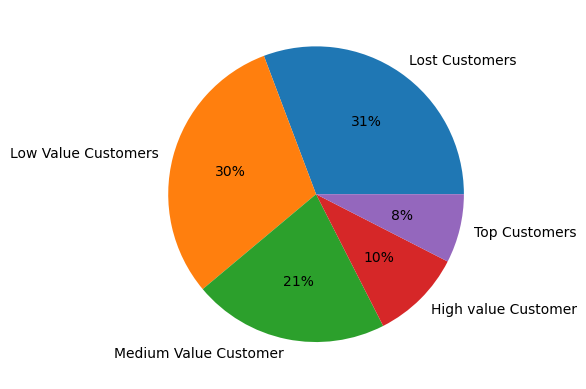

In [388]:
import matplotlib.pyplot as plt
plt.pie(rfm_df3.Customer_segment.value_counts(),
        labels=rfm_df3.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [391]:
df_treemap = rfm_df3.groupby('Customer_segment').agg(
    customers=('CustomerID', 'count')
).reset_index()
df_treemap.head()

,Customer_segment,customers
0,High value Customer,391
1,Lost Customers,1205
2,Low Value Customers,1190
3,Medium Value Customer,839
4,Top Customers,295


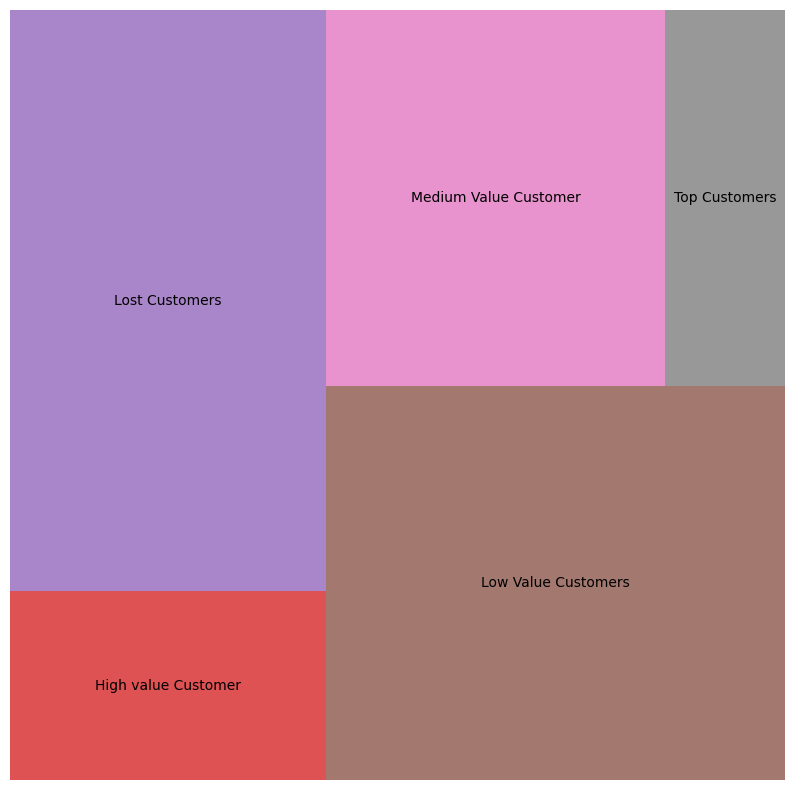

In [403]:
fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['customers'], 
              label=df_treemap['Customer_segment'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
             )
plt.axis('off')
plt.show()

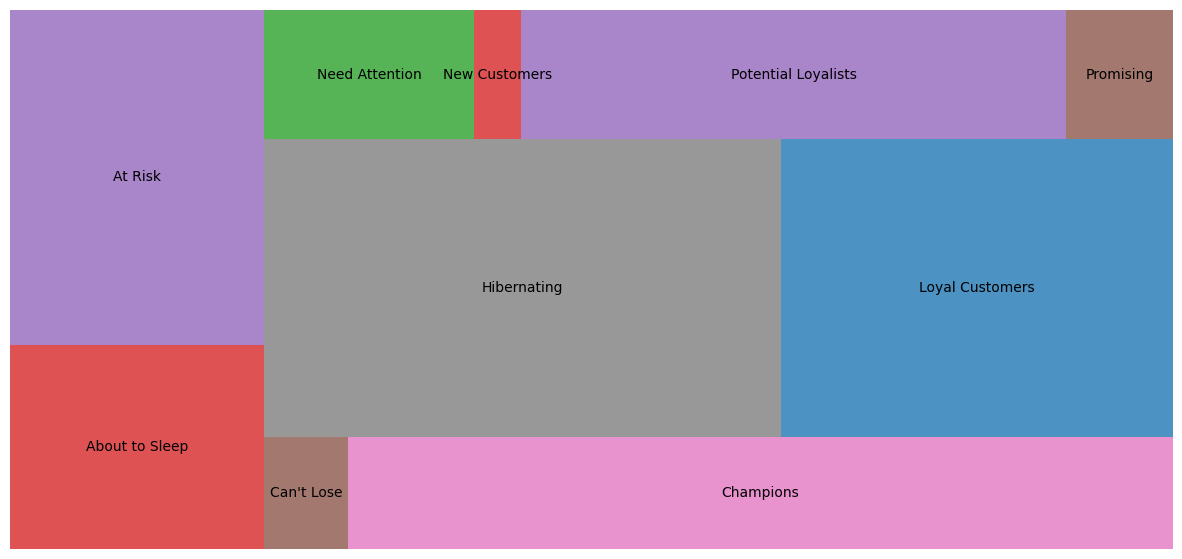

In [537]:
fig, ax = plt.subplots(1, figsize = (15,7))

squarify.plot(sizes=df_treemap['customers'], 
              label=df_treemap['segment'], 
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:blue', 'tab:green']
             )
plt.axis('off')
plt.show()

# THANK YOU